In [98]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('tether_transactions_522647.csv')
valid_trans = df[df.is_valid == 1]

In [3]:
valid_trans.head()

,tx_hash,block_height,block_hash,block_time,position_in_block,sending_address,reference_address,tx_type,amount,version,is_valid,fee
0,5ed3694e8a4fa8d3ec5c75eb6789492c69e65511522b22...,324140,00000000000000001e76250b3725547b5887329cfe3a8b...,2014-10-06 16:39:15,767,3MbYQMMmSkC3AgWkj9FMo5LsPTW1zBTwXL,NaN,Create Property - Manual,0.0,0,1,0.0001
1,ce36efda15bc6cf99ba6a010e71b47b00a5ea2071a3928...,324157,0000000000000000163661e7866eb97375c3e82f3b3c33...,2014-10-06 18:54:05,2082,3MbYQMMmSkC3AgWkj9FMo5LsPTW1zBTwXL,132j6EiUWNamSSjiYEQBhsbufsnBh4a28U,Grant Property Tokens,100.0,0,1,0.0001
2,f82f2f5a557ff3ed65984d80fa6de31541c879e12de56f...,324158,00000000000000000baea7954d4c8b386d2a3079d0f587...,2014-10-06 19:02:58,540,132j6EiUWNamSSjiYEQBhsbufsnBh4a28U,1En8LrBs7FGekRX3zSsmEVuPz2KVUEtCy2,Simple Send,5.0,0,1,0.0001
3,c21ad1d56122a7d41ad6eb98a92aed42a4af9caad09276...,324159,0000000000000000161bc2e8e46006a574a39b38341478...,2014-10-06 19:06:43,270,132j6EiUWNamSSjiYEQBhsbufsnBh4a28U,1LrKcqA81updDyASYW6113yXFrDrJ1xizs,Simple Send,10.0,0,1,0.0001
4,e46031f53e7067eb7531cef60f186b2311d907cf6321e5...,324167,00000000000000001c4ea4f2780c0817ec09cfb6a09f63...,2014-10-06 20:47:06,669,132j6EiUWNamSSjiYEQBhsbufsnBh4a28U,1CXE1tU9XKLRog1FTHXhQFkL3FrwWodumd,Simple Send,5.0,0,1,0.0001


In [17]:
top_trans = valid_trans[['sending_address', 'reference_address', 'amount']] \
    .groupby(['sending_address', 'reference_address']) \
    .sum() \
    .sort_values('amount', ascending=False) \
    .rename({'amount': 'total'}, axis='columns') \
    .reset_index()

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

In [18]:
top_trans.head()

,sending_address,reference_address,total
0,1MZAayfFJ9Kki2csoYjFVRKHFFSkdoMLtX,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,"2,961,894,344.32"
1,168o1kqNquEJeR9vosUB5fw4eAwcVAgh8P,1LAnF8h3qMGx3TSwNUHVneBZUEpwE4gu3D,"2,516,524,200.00"
2,1J1dCYzS5EerUuJCJ6iJYVPytCMVLXrgM9,1Po1oWkD2LmodfkBYiAktwh76vkF93LKnh,"1,998,424,303.33"
3,1NTMakcgVwQpMdGxRQnFKyb3G1FAJysSfz,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,"1,875,032,700.00"
4,3MbYQMMmSkC3AgWkj9FMo5LsPTW1zBTwXL,1NTMakcgVwQpMdGxRQnFKyb3G1FAJysSfz,"1,875,000,000.00"


In [22]:
addresses = pd.read_csv('address.csv')

In [23]:
addresses.head()

,address,id,exchange
0,1FoWyxwPXuj4C6abqwhjDWdz6D4PZgYRjA,Binance-01,Binance
1,12uhUkxpwkD2LGzKHUywoknoJ3fC9vev1x,Binance-02,Binance
2,16wf3d47R2ENjF5UGwQcPmsshxPc1fYCNj,Binance-03,Binance
3,1HsenWQk8UjPczo8DzVzqivLqWmBTfxC4V,Binance-04,Binance
4,17Fn7FxX3rs87Nvuit47163dHGp34C2aox,Binance-05,Binance


In [154]:
g = pd \
    .merge(top_trans[:100], addresses.rename(columns={'address': 'sending_address'}), how='left') \
    .rename(columns={'id': 'sending_id', 'exchange': 'sending_exchange'}) \
    .merge(addresses.rename(columns={'address': 'reference_address'}), how='left', on='reference_address') \
    .rename(columns={'id': 'reference_id', 'exchange': 'reference_exchange'}) \


In [155]:
def func(r):
    if pd.isnull(r['sending_id']):
        r['sending_id'] = r['sending_address'][:6] + '..'
        r['sending_exchange'] = r['sending_address'][:6] + '..'
    
    if pd.isnull(r['reference_id']):
        r['reference_id'] = r['reference_address'][:6] + '..'
        r['reference_exchange'] = r['reference_address'][:6] + '..'

    return r

g = g.apply(func, axis=1)

In [156]:
g['reference_id'].describe()

count             100
unique             49
top       Bitfinex-01
freq               18
Name: reference_id, dtype: object

In [103]:
g.head()

,sending_address,reference_address,total,sending_id,sending_exchange,reference_id,reference_exchange
0,1MZAayfFJ9Kki2csoYjFVRKHFFSkdoMLtX,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,"2,961,894,344.32",Bitfinex-02,Bitfinex,Bitfinex-01,Bitfinex
1,168o1kqNquEJeR9vosUB5fw4eAwcVAgh8P,1LAnF8h3qMGx3TSwNUHVneBZUEpwE4gu3D,"2,516,524,200.00",Huobi-03,Huobi,Huobi-02,Huobi
2,1J1dCYzS5EerUuJCJ6iJYVPytCMVLXrgM9,1Po1oWkD2LmodfkBYiAktwh76vkF93LKnh,"1,998,424,303.33",Poloniex-02,Poloniex,Poloniex-01,Poloniex
3,1NTMakcgVwQpMdGxRQnFKyb3G1FAJysSfz,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,"1,875,032,700.00",Tether-treas-02,Tether,Bitfinex-01,Bitfinex
4,3MbYQMMmSkC3AgWkj9FMo5LsPTW1zBTwXL,1NTMakcgVwQpMdGxRQnFKyb3G1FAJysSfz,"1,875,000,000.00",Tether-printer,Tether,Tether-treas-02,Tether


In [108]:
import networkx as nx
import matplotlib.pyplot as plt

In [114]:
G = nx.from_pandas_edgelist(g, 'sending_id', 'reference_id', ['total'], create_using=nx.DiGraph())

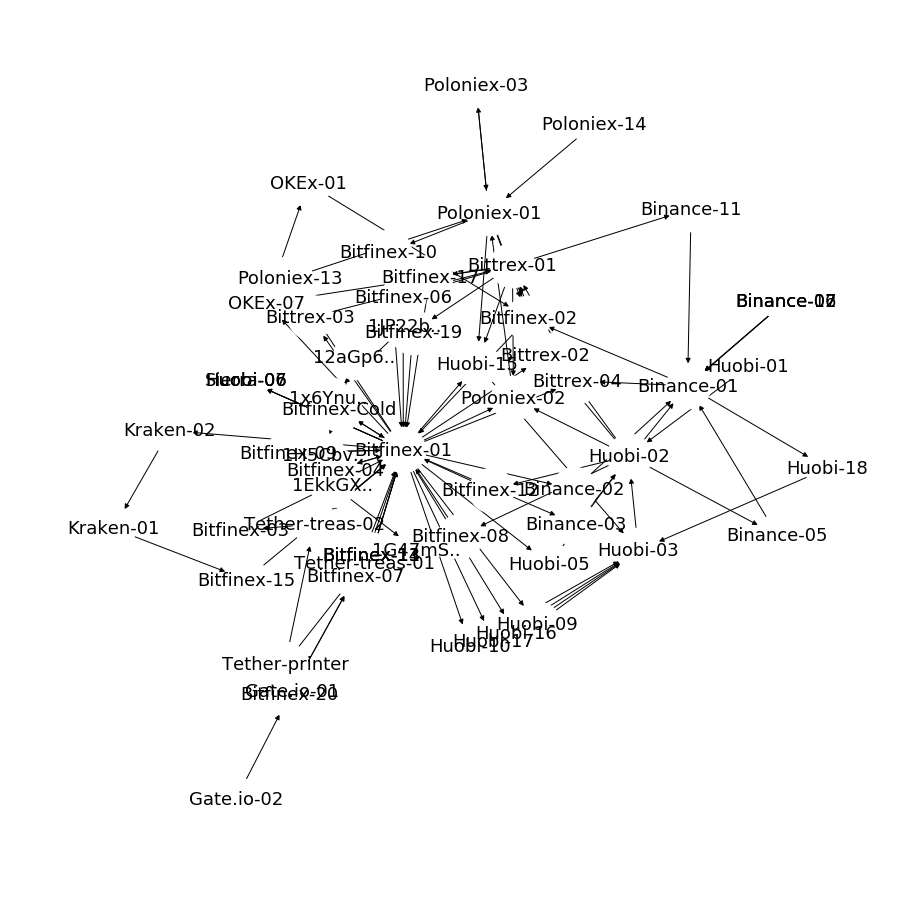

In [136]:
plt.figure(1, figsize=(12,12))
nx.draw_kamada_kawai(G, with_labels=True, font_size=18, node_color="white", node_size=2000)
plt.show()

In [157]:
h = g[['sending_exchange', 'reference_exchange', 'total']] \
    .groupby(['sending_exchange', 'reference_exchange']) \
    .sum().reset_index()

In [158]:
H = nx.from_pandas_edgelist(h, 'sending_exchange', 'reference_exchange', ['total'], create_using=nx.DiGraph())

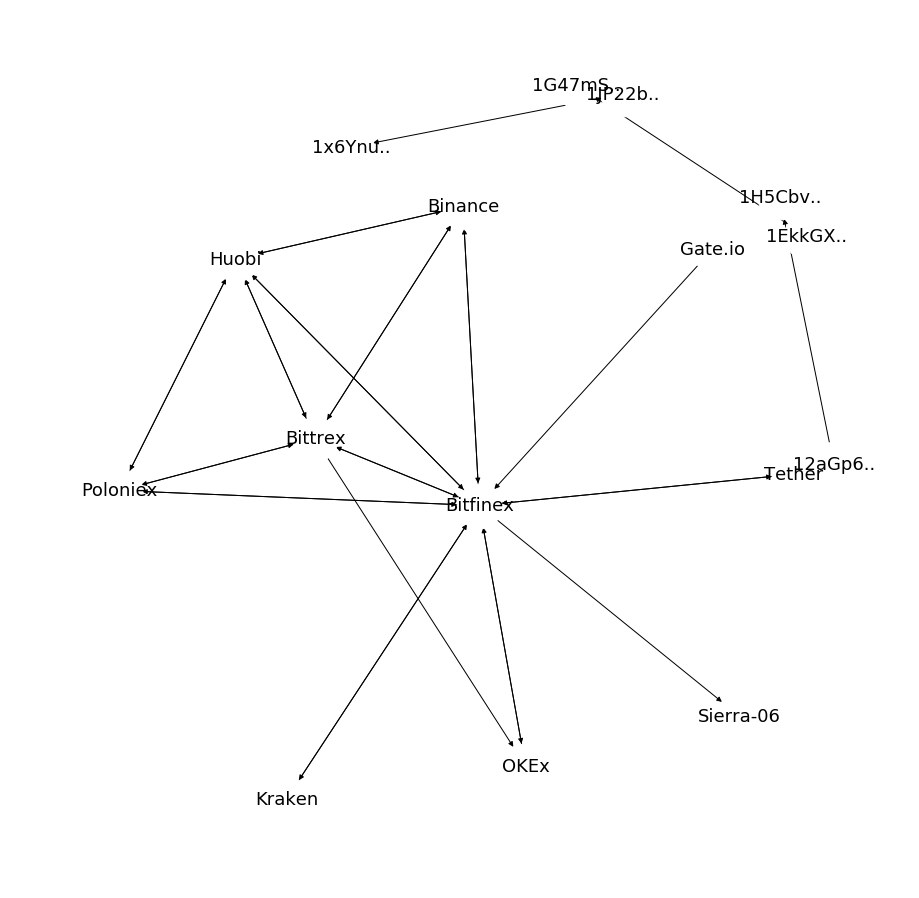

In [159]:
plt.figure(1, figsize=(12,12))
nx.draw_kamada_kawai(H, with_labels=True, font_size=18, node_color="white", node_size=2000)
plt.show()